In [64]:
from scipy import integrate
import numpy as np
import sympy as sym
import math as m
from scipy.interpolate import interp1d
from scipy import integrate
import matplotlib.pyplot as plt
#@matplotlib inline

r=np.load('r_for_W.npy')
W_r=np.load('W_r.npy')

In [11]:
r

array([ 0.1       ,  0.12992993,  0.15985986,  0.18978979,  0.21971972,
        0.24964965,  0.27957958,  0.30950951,  0.33943944,  0.36936937,
        0.3992993 ,  0.42922923,  0.45915916,  0.48908909,  0.51901902,
        0.54894895,  0.57887888,  0.60880881,  0.63873874,  0.66866867,
        0.6985986 ,  0.72852853,  0.75845846,  0.78838839,  0.81831832,
        0.84824825,  0.87817818,  0.90810811,  0.93803804,  0.96796797,
        0.9978979 ,  1.02782783,  1.05775776,  1.08768769,  1.11761762,
        1.14754755,  1.17747748,  1.20740741,  1.23733734,  1.26726727,
        1.2971972 ,  1.32712713,  1.35705706,  1.38698699,  1.41691692,
        1.44684685,  1.47677678,  1.50670671,  1.53663664,  1.56656657,
        1.5964965 ,  1.62642643,  1.65635636,  1.68628629,  1.71621622,
        1.74614615,  1.77607608,  1.80600601,  1.83593594,  1.86586587,
        1.8957958 ,  1.92572573,  1.95565566,  1.98558559,  2.01551552,
        2.04544545,  2.07537538,  2.10530531,  2.13523524,  2.16

In [101]:
from scipy.integrate import quad

#aa = sym.symbols('aa',real = True)

def wavefunc(x,aa):
    return 2/(np.sqrt(2*np.pi))*np.exp(-2*x/aa)

#Vij = 2*np.pi*quad(r*wavefunc(r,a)*W_r, (r,0.1, 30))

In [102]:
integrand(1,2)

-0.008849555496805248

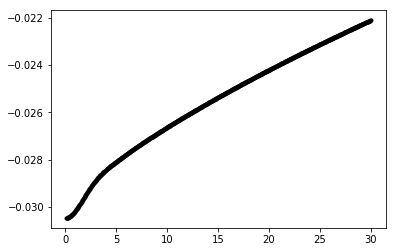

In [103]:
Wr = interp1d(r,W_r,kind='linear')
plt.plot(r,Wr(r))
plt.plot(r,W_r,'k.')

In [107]:
def integrand(rr,a):
    return rr*wavefunc(rr,a)*Wr(rr)
    
def int_result(a):    
    return 2*np.pi*integrate.quad(integrand, r[0], r[-1], args=(2,), limit=200)[0]

In [108]:
int_result(1)

-0.14738372063045

In [113]:
th=0.2341
te=0
Vek=0.31
Vhg=0.16
m0=9.1*10**(-29)
h=6*582*10**(-16)
m1e=0.55*m0
m1h=3.3
m2e=0.48*m0
m2h=2.1

mu11=1/(1/m1e+1/m1h)
mu12=1/(1/m1e+1/m2h)
mu21=1/(1/m2e+1/m1h)
mu22=1/(1/m2e+1/m2h)

def K11(a):
    return h**2/(2*mu11*a**2)

def K12(a):
    return h**2/(2*mu12*a**2)

def K21(a):
    return h**2/(2*mu21*a**2)

def K22(a):
    return h**2/(2*mu22*a**2)

In [114]:
H11=K11+V11+Vhg
H12=K12+V12
H21=K21+V21+Vek+Vhg
H22=K22+V22+Vek

H= np.array([H11, th, te, 0], [th, H12, 0, te], [te, 0, H21, th], [0, te, th, H22])

NameError: name 'V11' is not defined